In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
data = pd.read_json('https://raw.githubusercontent.com/Karrthik-Arya/Moodify-Learning/master/Assignment-2/data.json')
data.columns = ['x', 'y', 'label']

In [3]:
data.head()

,x,y,label
0,-3.005382,-1.701191,1
1,-2.908105,-1.699589,1
2,-2.958954,-1.660940,1
3,-2.922840,-1.638722,1
4,-2.924240,-1.508256,1


In [4]:
data['label'].value_counts()

1    4679
0    1321
Name: label, dtype: int64

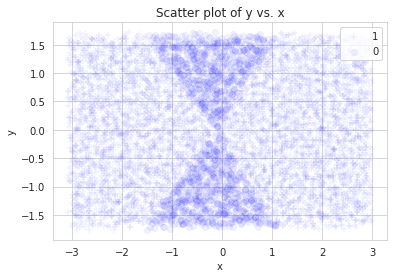

In [5]:
def plot_scatter_shape(data, cols, shape_col = 'label', col_y = 'y', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = data[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = data[data[shape_col] == cat]
            sns.regplot(x=col, y=col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
plot_scatter_shape(data, ['x'], alpha = 0.05)

In [6]:
data_test = data.sample(frac = 0.2, random_state=200)
data_train = data.drop(data_test.index)
print(data_test.shape)
print(data_train.shape)
data_train.reset_index(drop = True, inplace= True)
data_test.reset_index(drop = True, inplace= True)

(1200, 3)
(4800, 3)


In [7]:
def fn(x,y,coef):
  fx = 0
  for i in range(5):
    fx += coef[i]*(x**(4-i))*(y**i)
  return fx
coef = [0.005,0.005,0.005,0.005,0.005]
results = fn(data_train['x'], data_train['y'], coef)
print(results)
results = 1/(1+np.exp(-1*results))
print(results)


0       0.801862
1       0.825046
2       0.784583
3       0.727491
4       0.743629
          ...   
4795    0.690913
4796    0.650474
4797    0.773792
4798    0.695778
4799    0.781722
Length: 4800, dtype: float64
0       0.690373
1       0.695306
2       0.686667
3       0.674255
4       0.677789
          ...   
4795    0.666170
4796    0.657117
4797    0.684341
4798    0.667251
4799    0.686051
Length: 4800, dtype: float64


In [8]:
loss = -data_train['label']*np.log(results) - (1-data_train['label'])*np.log(1-results)
loss = loss.sum()/4800
print(loss)

0.6498686824541259


In [9]:
lr = 0.01

def grada1(data, coef ):
  X = data['x']
  Y = data['y']
  l = data['label']
  val = coef[0]*X**4+coef[1]*(X**3)*Y+coef[2]*(X**2)*(Y**2)+coef[3]*(X**1)*(Y**3)+coef[4]*(Y**4)
  grad = -(l/val)*(X**4)+((1-l)/(1-val))*(X**4)
  return grad.sum()/4800
def grada2(data, coef ):
  X = data['x']
  Y = data['y']
  l = data['label']
  val = coef[0]*X**4+coef[1]*(X**3)*Y+coef[2]*(X**2)*(Y**2)+coef[3]*(X**1)*(Y**3)+coef[4]*(Y**4)
  grad = -(l/val)*(X**3*Y)+((1-l)/(1-val))*(X**3*Y)
  return grad.sum()/4800
def grada3(data, coef ):
  X = data['x']
  Y = data['y']
  l = data['label']
  val = coef[0]*X**4+coef[1]*(X**3)*Y+coef[2]*(X**2)*(Y**2)+coef[3]*(X**1)*(Y**3)+coef[4]*(Y**4)
  grad = -(l/val)*(X**2*Y**2)+((1-l)/(1-val))*(X**2*Y**2)
  return grad.sum()/4800
def grada4(data, coef ):
  X = data['x']
  Y = data['y']
  l = data['label']
  val = coef[0]*X**4+coef[1]*(X**3)*Y+coef[2]*(X**2)*(Y**2)+coef[3]*(X**1)*(Y**3)+coef[4]*(Y**4)
  grad = -(l/val)*(X*(Y**3))+((1-l)/(1-val))*(X*(Y**3))
  return grad.sum()/4800
def grada5(data, coef ):
  X = data['x']
  Y = data['y']
  l = data['label']
  val = coef[0]*X**4+coef[1]*(X**3)*Y+coef[2]*(X**2)*(Y**2)+coef[3]*(X**1)*(Y**3)+coef[4]*(Y**4)
  grad = -(l/val)*(Y**4)+((1-l)/(1-val))*(Y**4)
  return grad.sum()/4800
  


for i in range(750):
  coef[0] = coef[0] - lr*grada1(data, coef)
  coef[1] = coef[1] - lr*grada2(data, coef)
  coef[2] = coef[2] - lr*grada3(data, coef)
  coef[3] = coef[3] - lr*grada4(data, coef)
  coef[4] = coef[4] - lr*grada5(data, coef)
results = fn(data_train['x'], data_train['y'], coef)
results = 1/(1+np.exp(-1*results))
loss = -data_train['label']*np.log(results) - (1-data_train['label'])*np.log(1-results)
loss = loss.sum()/4800
print(loss)


0.288172933627382


/home/winston/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:]])
print(results.shape)
scores = score_model(results, 0.56)
unique, counts = np.unique(scores, return_counts=True)
print(np.asarray((unique, counts)))
data_train['label'].value_counts()

(4800,)
[[   0    1]
 [1064 3736]]


1    3726
0    1074
Name: label, dtype: int64

In [11]:
results = fn(data_test['x'], data_test['y'], coef)
results = 1/(1+np.exp(-1*results))
print(results)
loss = -data_train['label']*np.log(results) - (1-data_train['label'])*np.log(1-results)
loss = loss.sum()/1200
print(loss)
scores = score_model(results, 0.56)
unique, counts = np.unique(scores, return_counts=True)
print(np.asarray((unique, counts)))
data_test['label'].value_counts()

0       1.000000
1       1.000000
2       1.000000
3       0.017612
4       1.000000
          ...   
1195    0.051512
1196    0.464246
1197    1.000000
1198    0.504331
1199    0.999884
Length: 1200, dtype: float64
inf
[[  0   1]
 [250 950]]


1    953
0    247
Name: label, dtype: int64

In [12]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(data_test['label'], scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       197                50
Actual negative        53               900

Accuracy  0.91
 
           Positive      Negative
Num case      247           953
Precision    0.79          0.95
Recall       0.80          0.94
F1           0.79          0.95


In [13]:
print(coef)

[4.305933627909765, -1.4408767356385077, 0.6406240449435464, 0.0733017440741542, -0.7816031639049753]
